# Austin Housing 


> TO DO 

# Get Data via Kaggle Download direct from the NB

only run this section once to get files

In [2]:
!mkdir <DIRECTORY>/.kaggle # rename to your directory if needed 

In [5]:
import os

directory = '<DIRECTORY>/.kaggle' # rename to your directory if needed
os.environ['KAGGLE_CONFIG_DIR'] = directory # SUPER IMPORTANT 

In [1]:
# install kaggle
# !pip install kaggle 

In [9]:
# run only once 
# create a hidden directory .kaggle 
# create json file 
# edit json file 

!mkdir /Users/michaelfronda/Desktop/Main/ML_Zoomcamp/HW5/.kaggle
!touch /Users/michaelfronda/Desktop/Main/ML_Zoomcamp/HW5/.kaggle/kaggle.json 
!chmod 600 /Users/michaelfronda/Desktop/Main/ML_Zoomcamp/Midterm_Project/.kaggle/kaggle.json

### Go to Kaggle and Sign into your account 

1) Go to `Profile` 
2) Go to `Settings`

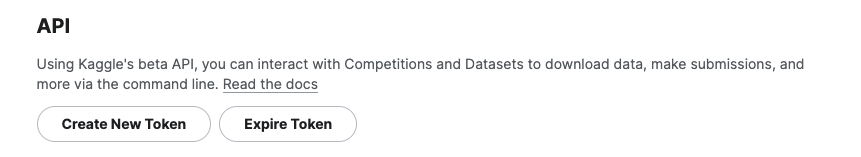

3) Click `Create New Token` 
4) Copy username and key into the newly created `kaggle.json` file (or just move it into the .kaggle folder
    - We are looking for your kaggle credentials to download systematically the data

In [8]:
# run this command you can replace `ericpierce/austinhousingprices` with your data from kaggle! 
!kaggle datasets download -d ericpierce/austinhousingprices

100%|█████████████████████████████████████▉| 2.34G/2.34G [01:50<00:00, 26.4MB/s]
100%|██████████████████████████████████████| 2.34G/2.34G [01:50<00:00, 22.7MB/s]


In [10]:
!ls 

EDA.ipynb               austinhousingprices.zip


In [14]:
# Unzip the file
# !unzip -o austinhousingprices.zip

In [15]:
# Clean up: We are not using house images in this project. So all we need is the data
# !rm -r austinhousingprices.zip
# !rm -r homeImages

In [13]:
!ls 

EDA.ipynb             austinHousingData.csv


# EDA 

In [113]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer

In [114]:
df = pd.read_csv('./data/austinHousingData.csv') # I created a manual folder to hold the data

print('Sample (3)\n##########################################\n')
display(df.sample(3))
print()
display(df.head(1).T)

Sample (3)
##########################################



,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
10821,29465530,austin,3009 Sunridge Dr,78741,Want to live just a few minutes from downtown?...,30.219154,-97.726562,1.98,2,False,...,1,1,3.766667,4.333333,1589,14,2.0,3,1,29465530_5e9617f5712de0e45b010887be8de0cf-p_f.jpg
12470,29479218,austin,6811 Kenosha Pass,78749,Colorado inspired home with beautiful views on...,30.231962,-97.866905,1.98,2,False,...,1,1,3.233333,6.000000,1494,17,3.0,3,2,29479218_7c27a210b90e089a3659aa4129eebb3d-p_f.jpg
14622,29397255,austin,2830 Salado St,78705,"2830 Salado St, Austin, TX 78705 is a vacant l...",30.295774,-97.745300,1.98,1,False,...,1,1,1.500000,6.000000,1196,16,0.0,3,1,29397255_edadbdf2a245587ef412f065d4ff83c3-p_f.jpg


,0
zpid,111373431
city,pflugerville
streetAddress,14424 Lake Victor Dr
zipcode,78660
description,"14424 Lake Victor Dr, Pflugerville, TX 78660 i..."
latitude,30.430632
longitude,-97.663078
propertyTaxRate,1.98
garageSpaces,2
hasAssociation,True


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zpid,15171.0,1.044193e+08,3.179426e+08,2.858495e+07,2.941115e+07,2.949441e+07,7.033762e+07,2.146313e+09
zipcode,15171.0,7.873593e+04,1.889348e+01,7.861700e+04,7.872700e+04,7.873900e+04,7.874900e+04,7.875900e+04
latitude,15171.0,3.029160e+01,9.697306e-02,3.008503e+01,3.020331e+01,3.028442e+01,3.036658e+01,3.051732e+01
longitude,15171.0,-9.777853e+01,8.471490e-02,-9.802206e+01,-9.783801e+01,-9.776954e+01,-9.771790e+01,-9.756950e+01
propertyTaxRate,15171.0,1.994085e+00,5.310204e-02,1.980000e+00,1.980000e+00,1.980000e+00,1.980000e+00,2.210000e+00
garageSpaces,15171.0,1.229187e+00,1.352117e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.200000e+01
parkingSpaces,15171.0,1.224507e+00,1.352732e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.200000e+01
yearBuilt,15171.0,1.988555e+03,2.157946e+01,1.905000e+03,1.974000e+03,1.993000e+03,2.006000e+03,2.020000e+03
latestPrice,15171.0,5.127677e+05,4.531853e+05,5.500000e+03,3.090000e+05,4.050000e+05,5.750000e+05,1.350000e+07
numPriceChanges,15171.0,3.032892e+00,2.487392e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.300000e+01


## General Cleaning

No real order here

In [117]:
# exclude `homeImage` 
# ID to images, we will keep the dataset simple
df = df.drop(columns=['homeImage'])

In [118]:
# Checking for missing
df.isnull().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   2
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [119]:
# for simplicity will be not be using description as a main feature
# saves us time on NLP analysis but could be a step in the future
# thus we can ignore nulls for now
df[df['description'].isnull()]

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
13491,58316504,austin,6617 Back Bay Ln,78739,NaN,30.189535,-97.897896,1.98,2,True,...,0,1,1,1.533333,8.666667,1664,18,3.0,4,2
14310,29348314,austin,5842 Westslope Dr,78731,NaN,30.345671,-97.784264,1.98,2,True,...,0,1,1,2.733333,7.000000,1177,16,6.0,4,3


In [120]:
# Lets understand the rest of the object types 
object_col = list(df.select_dtypes(include='object').columns)
object_col

['city',
 'streetAddress',
 'description',
 'homeType',
 'latest_saledate',
 'latestPriceSource']

In [121]:
# check unique values for object columns 
for c in object_col: 
    print('{}:  {}'.format(c, df[c].nunique()))

city:  9
streetAddress:  15164
description:  15132
homeType:  10
latest_saledate:  958
latestPriceSource:  225


In [122]:
# check values for city and homeType
display(df.city.unique())
display(df.homeType.unique())

array(['pflugerville', 'del valle', 'austin', 'driftwood', 'manor',
       'dripping springs', 'manchaca', 'west lake hills', 'road'],
      dtype=object)

array(['Single Family', 'Residential', 'Mobile / Manufactured',
       'Townhouse', 'Condo', 'Vacant Land', 'Multiple Occupancy', 'Other',
       'Apartment', 'MultiFamily'], dtype=object)

In [123]:
# road is interesting, double check it 
df[df['city'] == 'road']

# looks like an error lets reassign the city based on zipcode

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
7191,40988299,road,725 Sly Pass,78748,"Stunning 4 Bedroom, 3 Full, 2 Half Bath Home o...",30.158154,-97.813858,1.98,0,False,...,0,1,1,0.933333,3.333333,1424,14,5.0,4,2


In [124]:
# looks like Austin should be the city
df[df['zipcode'] == 78748]['city'].unique()

array(['austin', 'road'], dtype=object)

In [125]:
# set city 
df.loc[df['city'] == 'road', 'city'] = 'austin'

In [126]:
display(df['homeType'].value_counts())
display(df['homeType'].value_counts(normalize=True)) # for percents 

# since majority of houses are single family lets filter on those exclusively

homeType
Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: count, dtype: int64

homeType
Single Family            0.938699
Condo                    0.030980
Townhouse                0.011469
Multiple Occupancy       0.006328
Vacant Land              0.005471
Residential              0.002439
Apartment                0.002439
Mobile / Manufactured    0.001121
MultiFamily              0.000659
Other                    0.000395
Name: proportion, dtype: float64

In [127]:
# NOTE: Lets keep only single family homes, due to 93.9% of the values being Single Family homes. 
# Keeping condos and townhouses could skew the results
df = df[df['homeType'].isin(['Single Family'])]
                             
# , 'Condo', 'Townhouse'])] # saving this for perhaps an aggregated model for comparison

In [128]:
rows, columns = df.shape 

print('rows: {}\ncolumns: {}'.format(rows, columns))

rows: 14241
columns: 46


## Dependent Variable: Price

> Main Objective: is to determine the price of the potential homes based on features provided by users


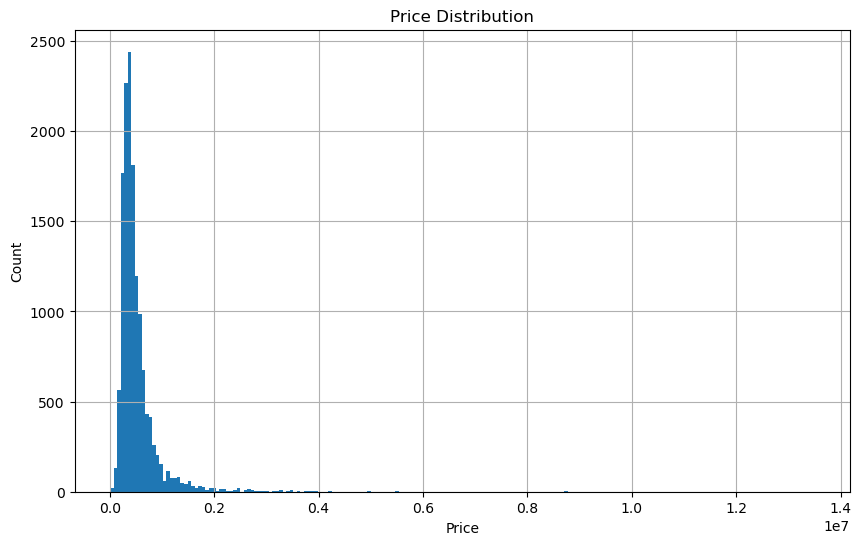

In [129]:
plt.figure(figsize=(10,6))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
df['latestPrice'].hist(bins=200);

# positive skew, suggests that there are outliers 

In [130]:
df[['latestPrice']].describe()

,latestPrice
count,1.424100e+04
mean,5.163879e+05
std,4.469692e+05
min,5.500000e+03
25%,3.100000e+05
50%,4.099000e+05
75%,5.750000e+05
max,1.350000e+07


/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


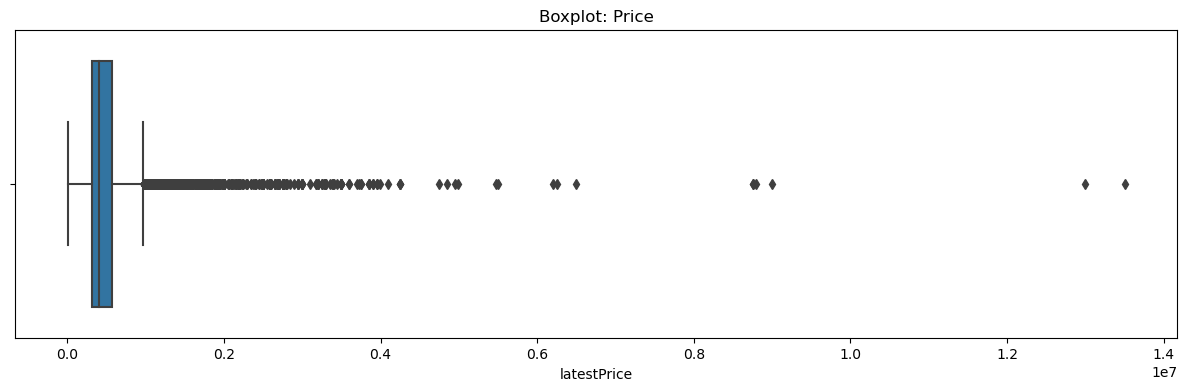

In [131]:
plt.figure(figsize=(15,4))
plt.title('Boxplot: Price')
sns.boxplot(df, x='latestPrice');

# highly priced houses are skewing the mean house as we can see

In [132]:
print('Mean: {}'.format(df['latestPrice'].mean())) 
print('Std: {}'.format(df['latestPrice'].std()))

Mean: 516387.8846288884
Std: 446969.1761237613


In [133]:
# obtain z scores
df['priceZScore'] = (df['latestPrice'] - df['latestPrice'].mean())/df['latestPrice'].std()

In [134]:
# view 
df[['latestPrice', 'priceZScore']]

,latestPrice,priceZScore
0,305000.0,-0.472936
1,295000.0,-0.495309
2,256125.0,-0.582284
3,240000.0,-0.618360
4,239900.0,-0.618584
...,...,...
15165,280000.0,-0.528868
15166,330000.0,-0.417004
15167,550000.0,0.075200
15168,875000.0,0.802320


In [135]:
# Filter out data houses over the Z-score threshold of 3
df[df['priceZScore'] > 3] # overly priced houses

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,priceZScore
37,29366912,austin,14423 Ridgetop Ter,78732,"~2.4 acres, ~240' Lake Travis waterfront, this...",30.415987,-97.900558,1.98,7,True,...,1,1,4.100000,7.000000,1277,16,7.0,7,2,8.353176
43,29366911,austin,14503 Ridgetop Ter,78732,Spectacular Waterfront Home on Lake Travis wit...,30.416706,-97.900703,1.98,2,False,...,1,1,4.166667,7.000000,1277,16,5.0,5,1,6.440292
50,80094409,austin,14007 Panorama Dr,78732,NEW TO MARKET ; Updated one of a kind estate 2...,30.418600,-97.890572,1.98,5,True,...,1,1,3.533333,7.000000,1277,16,7.0,5,2,5.444698
59,29366907,austin,14515 Ridgetop Ter,78732,PRICE\tMLS #\r\nCall for Price\t—\r\nSQ FOOTAG...,30.418095,-97.900818,1.98,6,False,...,1,1,4.166667,7.000000,1277,16,8.0,5,3,11.138603
184,124843021,austin,13115 Perryton Dr,78732,This highly custom home sits on a well-establi...,30.338959,-97.926979,1.98,4,True,...,1,1,3.433333,8.333333,1533,17,10.0,6,2,8.017582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14649,29342038,austin,4104 Shimmering Cv,78731,"4104 Shimmering Cv, Austin, TX 78731 is a sing...",30.325678,-97.776222,1.98,3,True,...,1,1,2.133333,7.000000,1177,16,7.0,5,2,6.898937
14664,29399226,austin,200 W 33rd St,78705,Immaculate fully remodeled home in beautiful A...,30.298559,-97.736778,1.98,0,False,...,1,1,1.500000,7.333333,1142,15,3.0,3,2,3.039610
14729,29336968,austin,1513 Northwood Rd,78703,Like NEW 1934 Pemberton Heights remodel! Taken...,30.298943,-97.754387,1.98,1,False,...,0,0,1.838296,5.778694,1237,15,6.0,5,2,3.710798
14750,29408826,austin,2506 Great Oaks Pkwy,78756,"Location, location, location! Central market, ...",30.319563,-97.746117,1.98,0,False,...,1,1,1.133333,7.000000,1177,16,2.0,4,1,3.766730


In [136]:
df = df[(df['priceZScore'] < 3) & (df['priceZScore'] > -3)] # -3 < zscore < 3

In [137]:
rows, columns = df.shape 

print('rows: {}\ncolumns: {}'.format(rows, columns))

rows: 14013
columns: 47


/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


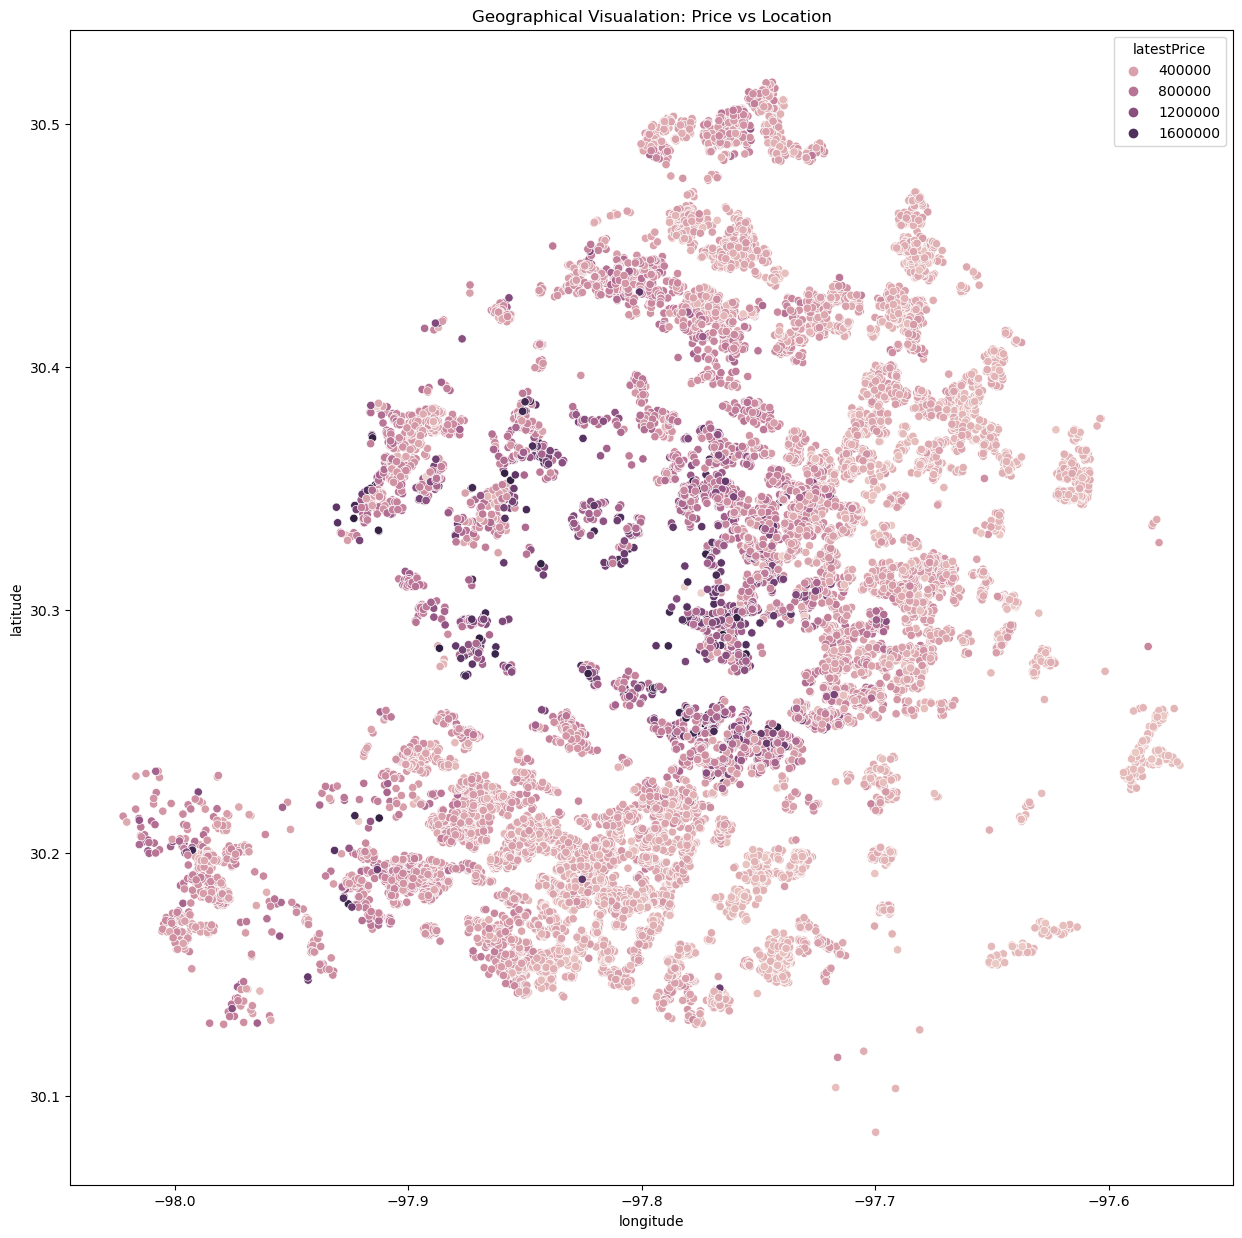

In [138]:
# view Houses across austin
plt.figure(figsize=(15,15))
plt.title('Geographical Visualation: Price vs Location')
sns.scatterplot(df, x='longitude', y='latitude', hue='latestPrice');

In [139]:
# explore average price per zipcode
avgprice_zip = df[['zipcode', 'latestPrice']].groupby(['zipcode']).mean().reset_index().rename(columns={'latestPrice': 'avgPriceZipcode'})
avgprice_zip

,zipcode,avgPriceZipcode
0,78617,1.969950e+05
1,78619,7.531492e+05
2,78652,3.753398e+05
3,78653,2.382933e+05
4,78660,2.857125e+05
5,78701,5.490000e+05
6,78702,5.144407e+05
7,78703,1.007137e+06
8,78704,8.204718e+05
9,78705,7.583666e+05


/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


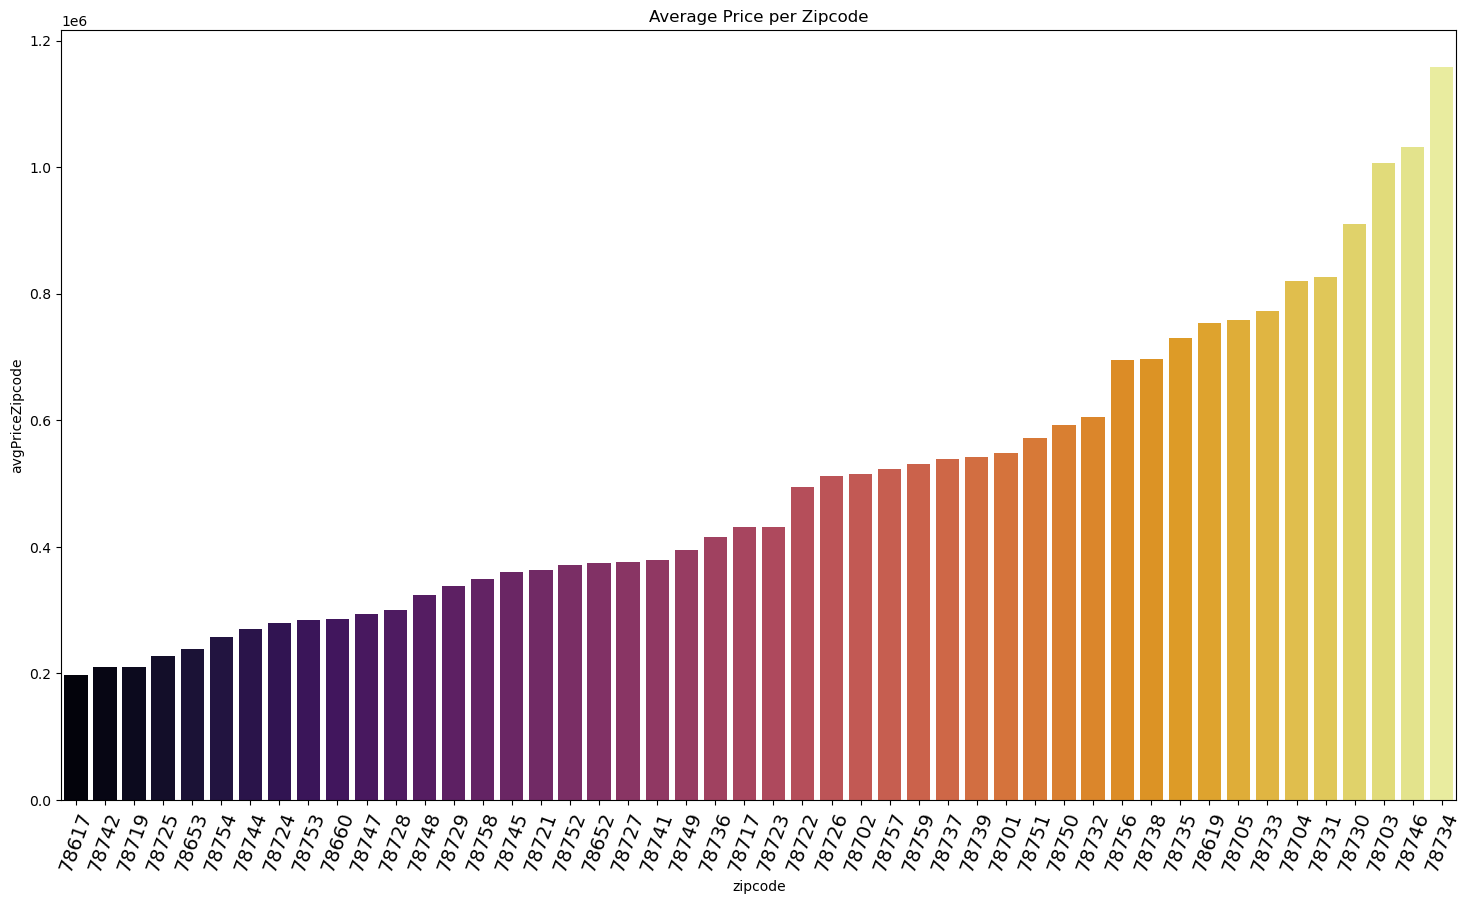

In [140]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=70, fontsize=14)
plt.title('Average Price per Zipcode')
sns.barplot(avgprice_zip, 
            x='zipcode',
            y='avgPriceZipcode', 
            palette='inferno',
            order=avgprice_zip.sort_values('avgPriceZipcode').zipcode);

# Feature Analysis (Indepedent Variable Correlation to Dependent Variable)

In [141]:
# Feature Engineering
# Using PCA we can combine long and latitude into one new feature called `location`
pca = PCA(n_components=1)
pc1 = pca.fit_transform(df[['longitude', 'latitude']])

df['location'] = pc1 # combine long and lat into one var 

In [142]:
do_not_include = ['zpid', 'priceZScore']

num_col = list(df.select_dtypes(include=(float, int)).columns)
num_col = [col for col in num_col if col not in do_not_include] # take out ids and z-scores
num_col

['zipcode',
 'latitude',
 'longitude',
 'propertyTaxRate',
 'garageSpaces',
 'parkingSpaces',
 'yearBuilt',
 'latestPrice',
 'numPriceChanges',
 'latest_salemonth',
 'latest_saleyear',
 'numOfPhotos',
 'numOfAccessibilityFeatures',
 'numOfAppliances',
 'numOfParkingFeatures',
 'numOfPatioAndPorchFeatures',
 'numOfSecurityFeatures',
 'numOfWaterfrontFeatures',
 'numOfWindowFeatures',
 'numOfCommunityFeatures',
 'lotSizeSqFt',
 'livingAreaSqFt',
 'numOfPrimarySchools',
 'numOfElementarySchools',
 'numOfMiddleSchools',
 'numOfHighSchools',
 'avgSchoolDistance',
 'avgSchoolRating',
 'avgSchoolSize',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms',
 'numOfStories',
 'location']

In [143]:
len(num_col)

34

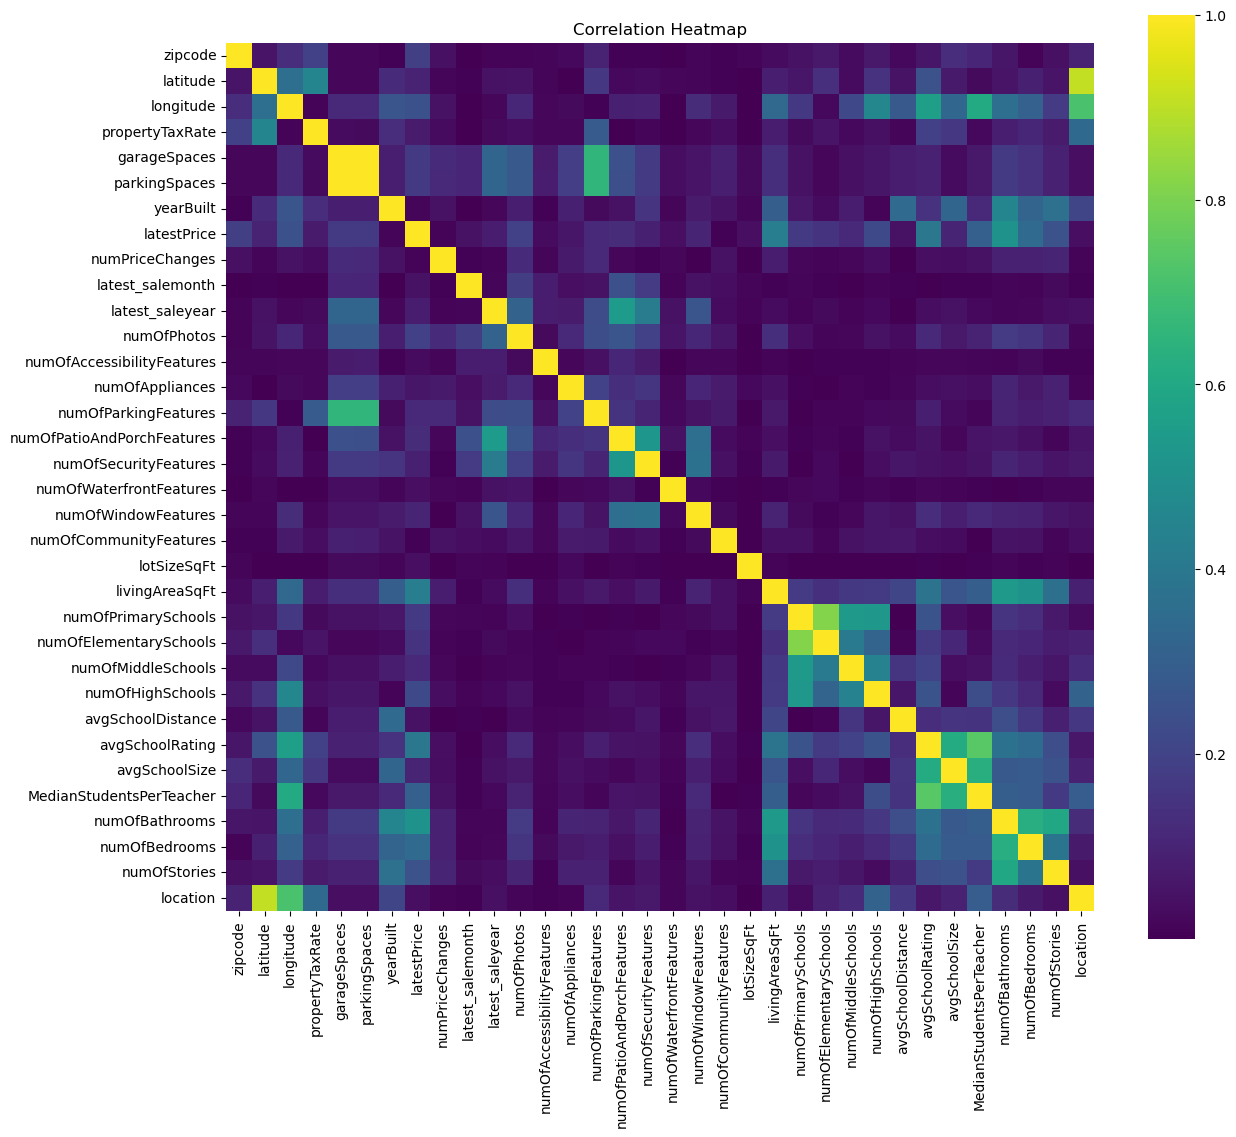

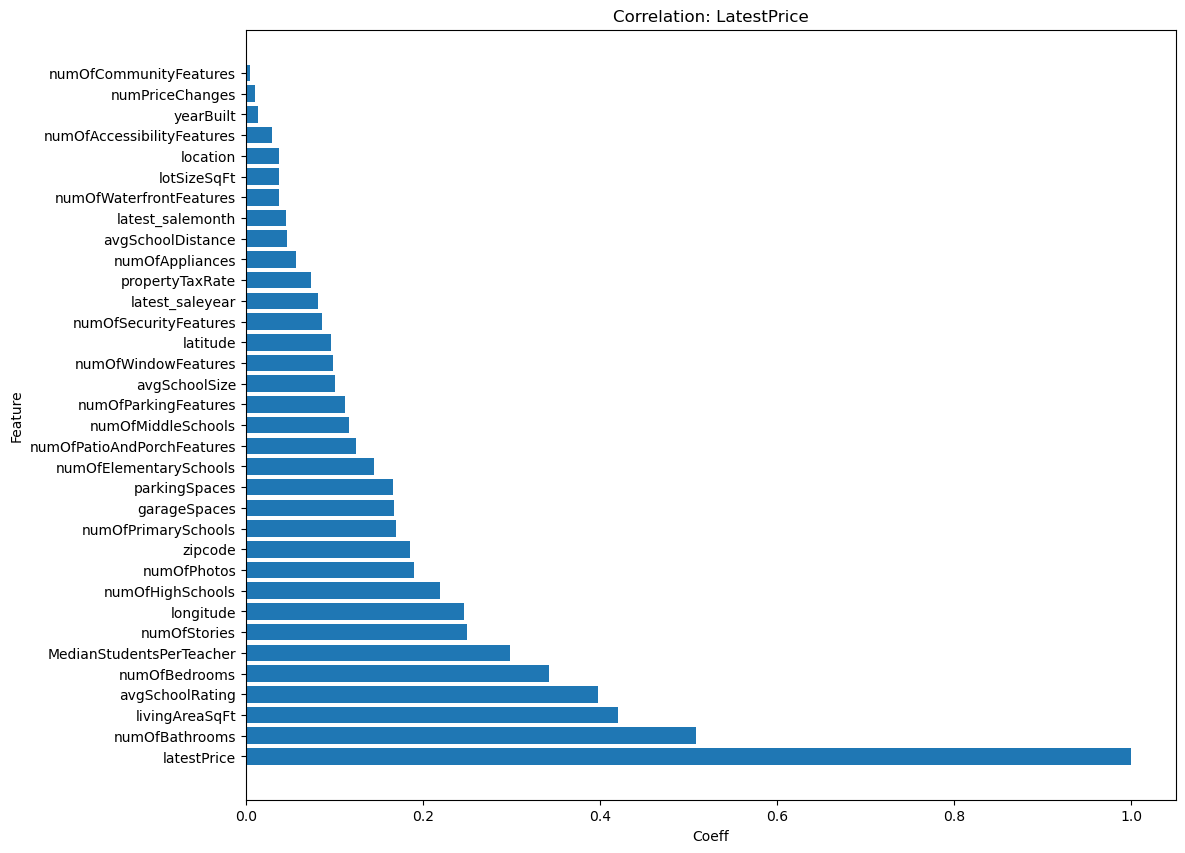

In [144]:
corr_mat = df[num_col].corr().abs()

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_mat, square= True, annot= False, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show();

# Plot the bar chart on the second subplot
plt.figure(figsize=(12, 10))
corr_price = corr_mat['latestPrice'].sort_values(ascending=False)
plt.barh(corr_price.index, corr_price)
plt.title('Correlation: LatestPrice')
plt.xlabel('Coeff')
plt.ylabel('Feature')
plt.show();

# can take away a few features 
# 1) garage spaces and parking spaces are 1to1 in correlation so keep one remove the other 
# 2) num of community features and accessibility features are not well correlated to price

/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

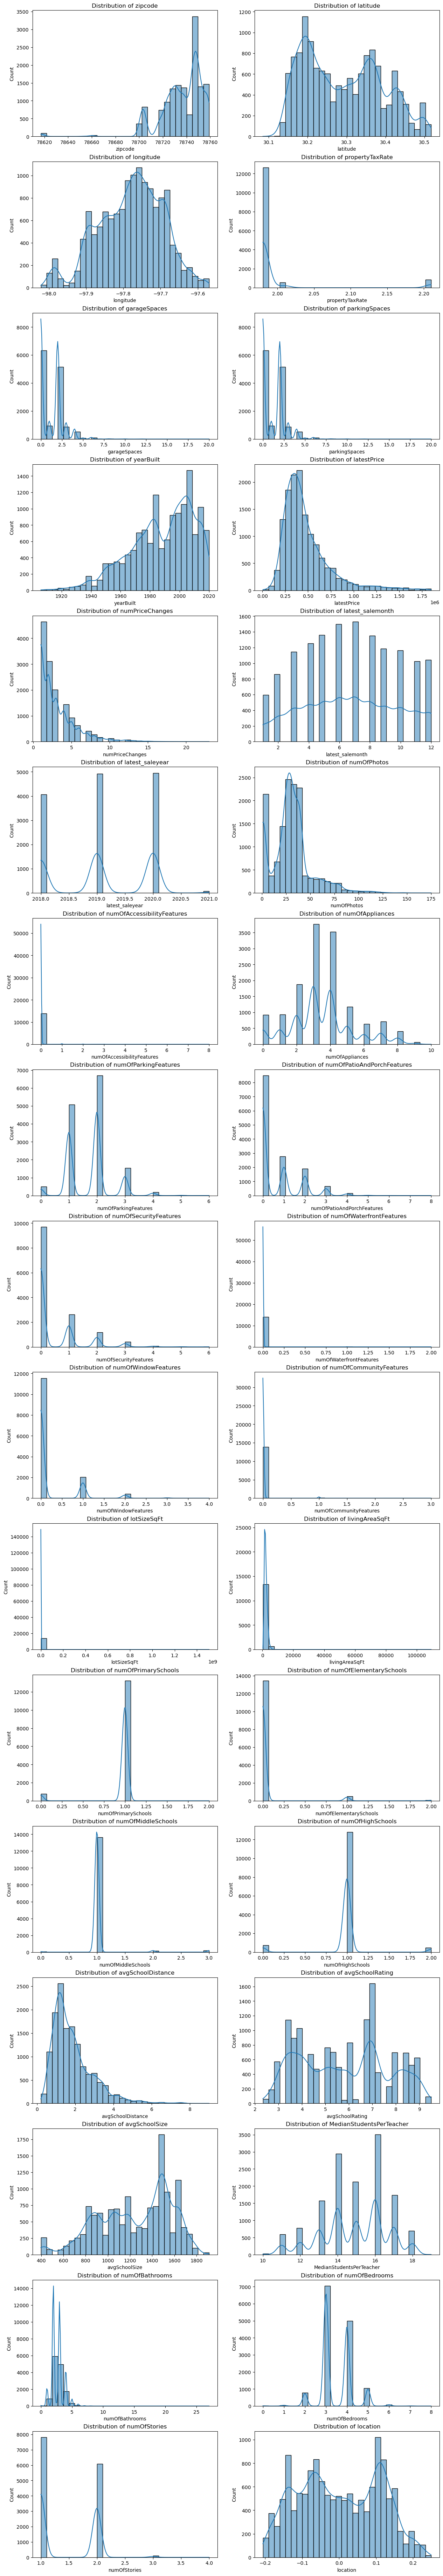

In [145]:
# View distributions for each numeric variable 
plt.figure(figsize=(15, 100))

for i, col in enumerate(df[num_col], 1):
    
    plt.subplot(18, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

In [148]:
# we can remove a few variables based on correlations
do_not_include_v2 = ['numOfAccessibilityFeatures', 'numOfCommunityFeatures', 'garageSpaces']

num_col_v2 = [col for col in num_col if col not in do_not_include_v2]
num_col_v2

['zipcode',
 'latitude',
 'longitude',
 'propertyTaxRate',
 'parkingSpaces',
 'yearBuilt',
 'latestPrice',
 'numPriceChanges',
 'latest_salemonth',
 'latest_saleyear',
 'numOfPhotos',
 'numOfAppliances',
 'numOfParkingFeatures',
 'numOfPatioAndPorchFeatures',
 'numOfSecurityFeatures',
 'numOfWaterfrontFeatures',
 'numOfWindowFeatures',
 'lotSizeSqFt',
 'livingAreaSqFt',
 'numOfPrimarySchools',
 'numOfElementarySchools',
 'numOfMiddleSchools',
 'numOfHighSchools',
 'avgSchoolDistance',
 'avgSchoolRating',
 'avgSchoolSize',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms',
 'numOfStories',
 'location']

In [170]:
df = df[num_col_v2]

# Modeling 

In [171]:
# 60/20/20 split
df_full_train, df_test = train_test_split(df[num_col_v2], test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train['latestPrice'].to_numpy()
y_val_orig = df_val['latestPrice'].to_numpy()
y_test_orig = df_test['latestPrice'].to_numpy()

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

df_train = df_train.drop(columns='latestPrice')
df_val = df_val.drop(columns='latestPrice')
df_test = df_test.drop(columns='latestPrice')

In [172]:
df_train.sample(1).T

,6835
zipcode,78758.000000
latitude,30.372566
longitude,-97.702995
propertyTaxRate,1.980000
parkingSpaces,4.000000
yearBuilt,1972.000000
numPriceChanges,3.000000
latest_salemonth,11.000000
latest_saleyear,2020.000000
numOfPhotos,89.000000


In [173]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [174]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [175]:
def score(model, y_val):
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred) # coeff of det 
    rsme = mean_squared_error(y_val, y_pred, squared=False) # rsme 
    
    print(f'{model} R2: {r2}')
    print(f'{model} RSME: {rsme}')
    
    return r2, rsme 

## The meaning of R<sup>2</sup>

***R<sup>2</sup>*** is the square of the correlation coefficient and represents the estimated percentage of the variance in our target variable ***Y*** that can be explained by our regression model.  ***Adjusted R<sup>2</sup>*** also penalizes for things such as large coefficients and extra variables to try and limit ***overfitting*** so it is often a better measure of model efficacy. It ranges from 0 to 1, 0 indicates that the model explains none of the variability of the response data around its mean. 1 indicates that the model explains all the variability of the response data around its mean. GENERALLY SPEAKING, **the higher the R-squared, the better the model fits your data.**

R<sup>2</sup> = Explained variation / Total variation

In [176]:
r2_lr, rmse_lr = score(linreg, y_val)

LinearRegression() R2: 0.5318076254075756
LinearRegression() RSME: 0.33454630107111333


In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=1)

In [179]:
r2_rf, rmse_rf = score(rf, y_val)

RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=1) R2: 0.7190616086210639
RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=1) RSME: 0.25914904340887185


In [180]:
# Lets select random forest

# Hyper parameter tuning

In [181]:
# Grid Search for hypertuning
from sklearn.model_selection import GridSearchCV

In [189]:
n_estimators= list(np.arange(1,22,2)) # test some intervals

In [191]:
# Set the parameters to train as well as their ranges
param_grid_forest = {"n_estimators": n_estimators, 
                    "n_jobs": [1,2,3,4,5] # testing n_jobs
                    }

rf_tuned = GridSearchCV(rf, 
                            param_grid_forest, 
                            cv = 3, 
                            n_jobs = 1, 
                            verbose = 5)

# Train on data, hypertuned based on gridsearch
rf_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 55 candidates, totalling 165 fits
[CV 1/3] END ..........n_estimators=1, n_jobs=1;, score=0.454 total time=   0.3s
[CV 2/3] END ..........n_estimators=1, n_jobs=1;, score=0.283 total time=   0.3s
[CV 3/3] END ..........n_estimators=1, n_jobs=1;, score=0.494 total time=   0.3s
[CV 1/3] END ..........n_estimators=1, n_jobs=2;, score=0.454 total time=   2.2s
[CV 2/3] END ..........n_estimators=1, n_jobs=2;, score=0.283 total time=   0.8s
[CV 3/3] END ..........n_estimators=1, n_jobs=2;, score=0.494 total time=   0.3s
[CV 1/3] END ..........n_estimators=1, n_jobs=3;, score=0.454 total time=   1.3s
[CV 2/3] END ..........n_estimators=1, n_jobs=3;, score=0.283 total time=   0.8s
[CV 3/3] END ..........n_estimators=1, n_jobs=3;, score=0.494 total time=   0.3s
[CV 1/3] END ..........n_estimators=1, n_jobs=4;, score=0.454 total time=   0.8s
[CV 2/3] END ..........n_estimators=1, n_jobs=4;, score=0.283 total time=   0.3s
[CV 3/3] END ..........n_estimators=1, n_jobs=4

[CV 3/3] END .........n_estimators=13, n_jobs=4;, score=0.685 total time=   1.1s
[CV 1/3] END .........n_estimators=13, n_jobs=5;, score=0.747 total time=   2.4s
[CV 2/3] END .........n_estimators=13, n_jobs=5;, score=0.688 total time=   1.0s
[CV 3/3] END .........n_estimators=13, n_jobs=5;, score=0.685 total time=   1.0s
[CV 1/3] END .........n_estimators=15, n_jobs=1;, score=0.753 total time=   3.9s
[CV 2/3] END .........n_estimators=15, n_jobs=1;, score=0.689 total time=   4.1s
[CV 3/3] END .........n_estimators=15, n_jobs=1;, score=0.685 total time=   3.9s
[CV 1/3] END .........n_estimators=15, n_jobs=2;, score=0.753 total time=   4.4s
[CV 2/3] END .........n_estimators=15, n_jobs=2;, score=0.689 total time=   2.7s
[CV 3/3] END .........n_estimators=15, n_jobs=2;, score=0.685 total time=   2.4s
[CV 1/3] END .........n_estimators=15, n_jobs=3;, score=0.753 total time=   3.2s
[CV 2/3] END .........n_estimators=15, n_jobs=3;, score=0.689 total time=   1.7s
[CV 3/3] END .........n_esti

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, n_jobs=1,
                                             random_state=1),
             n_jobs=1,
             param_grid={'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                          21],
                         'n_jobs': [1, 2, 3, 4, 5]},
             verbose=5)

In [192]:
r2_rf, rmse_rf = score(rf_tuned, y_val)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, n_jobs=1,
                                             random_state=1),
             n_jobs=1,
             param_grid={'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                          21],
                         'n_jobs': [1, 2, 3, 4, 5]},
             verbose=5) R2: 0.7289261393671462
GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, n_jobs=1,
                                             random_state=1),
             n_jobs=1,
             param_grid={'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                          21],
                         'n_jobs': [1, 2, 3, 4, 5]},
             verbose=5) RSME: 0.25455866511918646


In [193]:
# small improvements!

In [194]:
data = df.copy() 

In [201]:
data.to_csv('./data/final_data.csv', index=False) # export final dataset